# **Importing libraries**

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Data**

---





In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/centre.csv")

OSError: ignored

# **Business understanding**

---




> It's business that wants to use Vibration analysis in order to look for problems and anomalies in their machines. They want to implement a predictive analysis by studying the variation of amplitude of an object in motion. The goal is to gain key insights into the health of equipment.



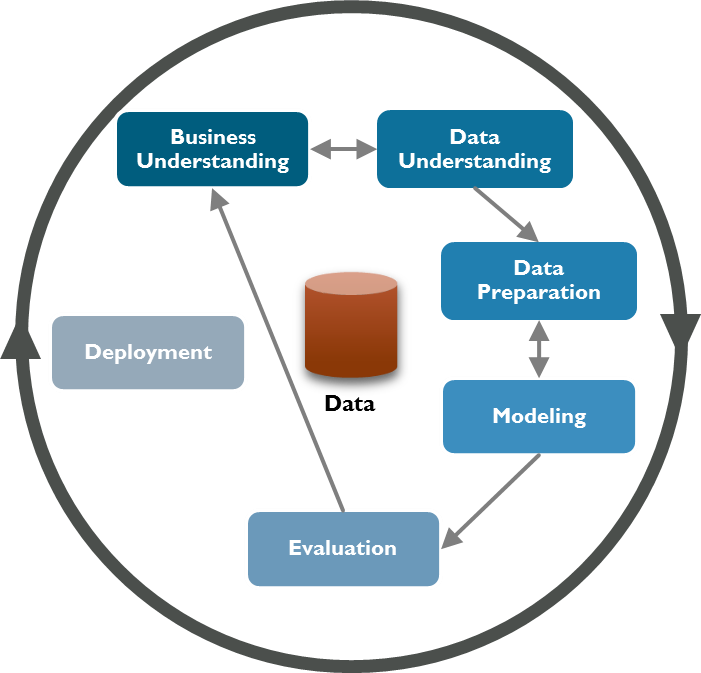

# **Data Understanding**

---




> Using the "vibration_dataset" we're going use the CRISP-DM method to understand the data. 

In [ ]:
df.head(10)

,Unnamed: 0,pos,g,fftg,fftv,F,C
0,1,P1V,"[-0.16512878645751894, 0.04998307178737588, -0...","[0.0006586228415304686, 0.0008392442605411405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2966064382657...",Normal,None
1,2,P1H,"[-0.042161579465260245, 0.021362479328271962, ...","[0.0006843542482240162, 0.0008895457854118105,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4527706580487...",Normal,None
2,3,P2V,"[-0.1349568120102025, 0.23669171459765884, 0.0...","[0.0006736708035253035, 0.0008349143002841891,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3385470510031...",Normal,None
3,4,P2A,"[0.12349800107774804, 0.25274141834206476, 0.2...","[0.0008922086829811786, 0.0012222498163517285,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5506433760599...",Normal,None
4,5,P1V,"[0.021572814759439424, 0.08107507627351192, 0....","[0.0003683865447006467, 0.00046141507219113866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2025792082014...",Normal,None
5,6,P1H,"[0.021332648423401317, -0.009386762506474392, ...","[0.0003587953667600207, 0.0004338874040284539,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1240063188205...",Normal,None
6,7,P2V,"[0.07477511361537875, 0.039989785744177435, 0....","[0.0003661202223679352, 0.0003890454659570795,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1218960012000...",Normal,None
7,8,P2A,"[0.10295831882804733, 0.16743625856980135, 0.1...","[0.000355501074240803, 0.00046823194169781434,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2145922611359...",Normal,None
8,9,P1V,"[-0.10815052227518294, 0.2034304270971226, -0....","[0.00039617187637922094, 0.0004439483666090007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1738320066407...",Normal,None
9,10,P1H,"[0.030844485392866883, 0.11378154507136054, 0....","[0.0004038273964523287, 0.0005392493614174257,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2250162351956...",Normal,None


The dataset contain 4 interesting features : 


*   **pos** column refers to the sensors position (it's useful to know the source of the measure)
*   **fftv** frequency signal 1 
*   **fftg** frequency signal 2
*   **g** frequency signal
*   **F** problem with the machine
*   **C** position of the problem


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1020 non-null   int64 
 1   pos         1020 non-null   object
 2   g           1020 non-null   object
 3   fftg        1020 non-null   object
 4   fftv        1020 non-null   object
 5   F           1020 non-null   object
 6   C           1020 non-null   object
dtypes: int64(1), object(6)
memory usage: 55.9+ KB


In [ ]:
df.describe()

,Unnamed: 0
count,1020.000000
mean,510.500000
std,294.592939
min,1.000000
25%,255.750000
50%,510.500000
75%,765.250000
max,1020.000000



> Each row is **JSON data** ( it's char that contain a list of values ), we need to transform the JSON data and extract the list of values.To do that lets first select each column sperately and convert it using the JSON library and more precisely the *json loads function*.


In [ ]:
df_fftg = df["fftg"]
df_g = df["g"]
df_fftv = df["fftv"]

In [ ]:
import json

In [ ]:
df_fftg[0] = json.loads(df_fftg[0])
df_g[0] = json.loads(df_g[0])
df_fftv[0] = json.loads(df_fftv[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 


> Let's visualise each of our colomns (lets' take the first row as an illustration)

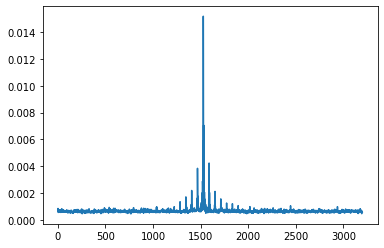

In [ ]:
plt.plot(df_fftg[0])
plt.show()

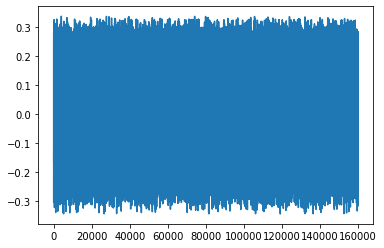

In [ ]:
plt.plot(df_g[0])

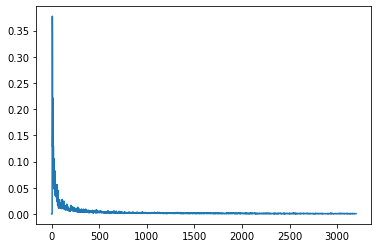

In [ ]:
plt.plot(df_fftv[0])

(0.0, 100.0, 0.0, 0.5)

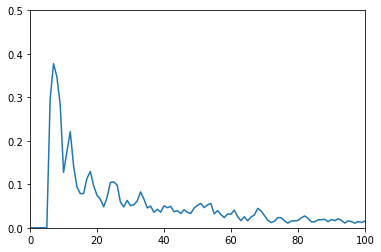

In [ ]:
plt.plot(df_fftv[0])
plt.axis([0,100,0,0.5])

From these three visialisations it seems that there's **no relation** between the atributes

# **Data Preparation**

---



The three forms of signal g, fftg and fftv are heavy. The data needs to be cleaned This is why we 're going to define: 

*   NGV : RMS (root mean square) of fftv
*   NGA : RMS of fftg
*   A1F0 : amplitude on velocity spectrum at the frequency 1*F0
*   A2F0 : amplitude on velocity spectrum at the frequency 2*F0

In [ ]:
df_fftg

0       [0.0006586228415304686, 0.0008392442605411405,...
1       [0.0006843542482240162, 0.0008895457854118105,...
2       [0.0006736708035253035, 0.0008349143002841891,...
3       [0.0008922086829811786, 0.0012222498163517285,...
4       [0.0003683865447006467, 0.00046141507219113866...
                              ...                        
1015    [0.0013470897256730337, 0.0021139789812571366,...
1016    [0.001384099028685586, 0.0021601822551360617, ...
1017    [0.0013403005936539496, 0.002314003743353513, ...
1018    [0.001419439714691728, 0.002208483168563792, 0...
1019    [0.0013137535337891964, 0.0022039447807009104,...
Name: fftg, Length: 1020, dtype: object



> **Compute the NGV** (KPI of fftv)



In [ ]:
NGV = []
for j in range (0, len(df_fftv)):
  df_fftv[j] = json.loads(df_fftv[j])
  N = len(df_fftv[j])
  s = 0
  for i in range(0,N):
    df_fftv[j][i] = float(df_fftv[j][i])
    s = (df_fftv[j][i])**2 + s
    NGVj = (s)**(0.5)
    NGV.append(NGVj)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
len(df_fftv[0])

3200

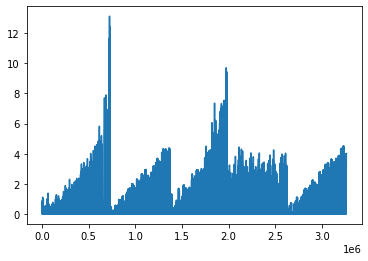

In [ ]:
plt.plot(NGV)

(0.0, 1000000.0, 0.0, 14.0)

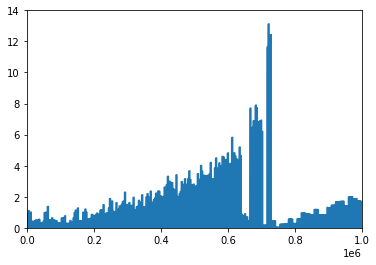

In [ ]:
plt.plot(NGV)
plt.axis([0,1*(10)**6,0,14])

In [ ]:
df_NGV = pd.DataFrame(NGV)
df_NGV

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
3263995,4.013837
3263996,4.013837
3263997,4.013837
3263998,4.013837



> **Compute the NGA** (KPI of fftg)

In [ ]:
NGA = []
for j in range (0, len(df_fftg)):
  df_fftg[j] = json.loads(df_fftg[j])
  N = len(df_fftg[j])
  s = 0
  for i in range(0,N):
    df_fftg[j][i] = float(df_fftg[j][i])
    s = (df_fftg[j][i])**2 + s
    NGAj = (s)**(0.5)
    NGA.append(NGAj)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


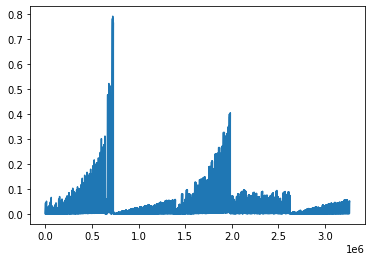

In [ ]:
plt.plot(NGA)

In [ ]:
df_NGA = pd.DataFrame(NGA)
df_NGA

,0
0,0.000659
1,0.001067
2,0.001307
3,0.001421
4,0.001521
...,...
3263995,0.050291
3263996,0.050294
3263997,0.050298
3263998,0.050301




>**Compute G** (KPI of G)



In [ ]:
G = []
for j in range (0, len(df_g)):
  df_g[j] = json.loads(df_g[j])
  N = 3200
  s = 0
  for i in range(0,N):
    df_g[j][i] = float(df_g[j][i])
    s = (df_g[j][i])**2 + s
    NGAj = (s)**(0.5)
    G.append(NGAj)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


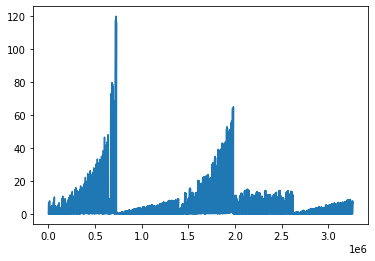

In [ ]:
plt.plot(G)

In [ ]:
df_G = pd.DataFrame(G)
df_G

,0
0,0.165129
1,0.172528
2,0.180150
3,0.256356
4,0.391828
...,...
3263995,7.690372
3263996,7.690550
3263997,7.691053
3263998,7.691064


In [ ]:
df_pos = df['pos']
df_F = df['F']
df_C = df['C']
df1 = pd.concat([df_pos,df_NGA, df_NGV, df_G, df_F, df_C], join = 'outer', axis = 1) 

In [ ]:
df1.columns = ['pos','NGA','NGV','G','F','C']
df1.head(10)

,pos,NGA,NGV,G,F,C
0,P1V,0.000659,0.000000,0.165129,Normal,None
1,P1H,0.001067,0.000000,0.172528,Normal,None
2,P2V,0.001307,0.000000,0.180150,Normal,None
3,P2A,0.001421,0.000000,0.256356,Normal,None
4,P1V,0.001521,0.000000,0.391828,Normal,None
5,P1H,0.001682,0.000000,0.392006,Normal,None
6,P2V,0.001822,0.296606,0.400378,Normal,None
7,P2A,0.001923,0.479937,0.452721,Normal,None
8,P1V,0.002026,0.592609,0.465285,Normal,None
9,P1H,0.002149,0.656683,0.493702,Normal,None


In [ ]:
df.to_csv(r'C:\Users\tariq\Desktop\bi\12.csv')

In [ ]:
df1.to_csv('/content/drive/MyDrive/12.csv')



>**Check missing values**

In [ ]:
df1.isna().sum()

pos    3262980
NGA          0
NGV          0
G            0
F      3262980
C      3262980
dtype: int64

In [ ]:
df1.isna().sum()/len(df1)*100

pos    99.96875
NGA     0.00000
NGV     0.00000
G       0.00000
F      99.96875
C      99.96875
dtype: float64


> As we see 99% of tha values in the column "pos", "F" and "C" are missing. we must format it.


> **1- Format the 'pos' column** :

In [ ]:
df_pos.head(10)

0    P1V
1    P1H
2    P2V
3    P2A
4    P1V
5    P1H
6    P2V
7    P2A
8    P1V
9    P1H
Name: pos, dtype: object


> First, let's convert our dataframe column to a list

In [ ]:
l_pos = df['pos'].tolist()
len(l_pos) 

1020


> we need to fill the missing values in the column 'pos' with 4 consecutive char value ('P1V', 'P1H','P2V','P2A')

> At end, we need to have a list of ('P1V','P1H','P2V','P2A') with a lenght equal to our dataframe (the lenght of our dataframe = 3264000) 

In [ ]:
L=[]
for i in range (0,816000):
  L.extend(('P1V','P1H','P2V','P2A'))
len(L)

3264000


> Finally, we convert our list to a dataframe.

In [ ]:
df_pos = pd.DataFrame (L, columns = ['pos'])

In [ ]:
df_pos

,pos
0,P1V
1,P1H
2,P2V
3,P2A
4,P1V
...,...
3263995,P2A
3263996,P1V
3263997,P1H
3263998,P2V




> **2-Format the F and C column**




> let's try to find out if there is a way to fill in the missing data

In [ ]:
df_F.values

array(['Normal', 'Normal', 'Normal', ..., 'Structural Fault',
       'Structural Fault', 'Structural Fault'], dtype=object)

In [ ]:
df_F

0                 Normal
1                 Normal
2                 Normal
3                 Normal
4                 Normal
              ...       
1015    Structural Fault
1016    Structural Fault
1017    Structural Fault
1018    Structural Fault
1019    Structural Fault
Name: F, Length: 1020, dtype: object

In [ ]:
def unique(list1):
     
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print (x)

In [ ]:
l_F = df['F'].tolist()
len(l_F)

1020

In [ ]:
#showing all the unique values of the list
unique(l_F)

Imbalance
Structural Fault
Misalignment
Gear fault
Bearing Lubrification Fault
Mechanical looseness
Normal


In [ ]:
count = l_F.count('Normal')
count

655

In [ ]:
count = l_F.count('Imbalance')
count

60

In [ ]:
count = l_F.count('Misalignment')
count

81

In [ ]:
count = l_F.count('Gear fault')
count

16

In [ ]:
count = l_F.count('Bearing Lubrification Fault')
count

51

In [ ]:
count = l_F.count('Structural Fault')
count

72



> It seems that there is no relation in lenght between the values in the missing data. We have to drop it out.





> Format the C column



In [ ]:
df_C.values

array(['None', 'None', 'None', ..., 'Frame', 'Frame', 'Frame'],
      dtype=object)

In [ ]:
l_C = df['C'].tolist()
len(l_C)

1020

In [ ]:
#showing all the unique values of the list
unique(l_C)

Frame
Loosness
Rotor
None
Lubrification
Link
Gear


In [ ]:
count = l_C.count('Frame')
count

72

In [ ]:
count = l_C.count('Loosness')
count

85

In [ ]:
count = l_C.count('Rotor')
count

60



> Again no clear relationship between the lenght of the data. we have two choice either we drop out the three columns 'pos','C','F' or we drop out the rows. 


> If we drop all the missing rows, we will pay the price of missing data which can effect the accuracy of our model. 





**Our cleaned DATA**

In [ ]:
df1 = pd.concat([df_pos,df_NGA, df_NGV, df_G], join = 'outer', axis = 1) 
df1.columns = ['pos','NGA','NGV','G']
df1

,pos,NGA,NGV,G
0,P1V,0.000659,0.000000,0.165129
1,P1H,0.001067,0.000000,0.172528
2,P2V,0.001307,0.000000,0.180150
3,P2A,0.001421,0.000000,0.256356
4,P1V,0.001521,0.000000,0.391828
...,...,...,...,...
3263995,P2A,0.050291,4.013837,7.690372
3263996,P1V,0.050294,4.013837,7.690550
3263997,P1H,0.050298,4.013837,7.691053
3263998,P2V,0.050301,4.013837,7.691064




> **Saving the cleaned data**



In [ ]:
df1.to_csv('/content/drive/MyDrive/cleaned data.csv')

# **Modeling** 

---
*  Model choice : Linear regression
*  target = 'G'
*  features = 'NGA'
---

In [ ]:
df1 = pd.concat([df_pos,df_NGA, df_NGV, df_G], join = 'outer', axis = 1) 
df1.columns = ['pos','NGA','NGV','G']
df1.head(10)

,pos,NGA,NGV,G
0,P1V,0.000659,0.000000,0.165129
1,P1H,0.001067,0.000000,0.172528
2,P2V,0.001307,0.000000,0.180150
3,P2A,0.001421,0.000000,0.256356
4,P1V,0.001521,0.000000,0.391828
5,P1H,0.001682,0.000000,0.392006
6,P2V,0.001822,0.296606,0.400378
7,P2A,0.001923,0.479937,0.452721
8,P1V,0.002026,0.592609,0.465285
9,P1H,0.002149,0.656683,0.493702


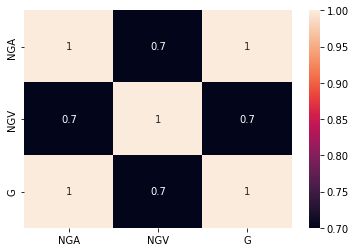

In [ ]:
import seaborn as sns
matrice_corr = df1.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(np.c_[df1['NGA']], columns = ['NGA'])
Y=df1['G']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2284800, 1)
(979200, 1)
(2284800,)
(979200,)


In [ ]:
from sklearn.linear_model import LinearRegression
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

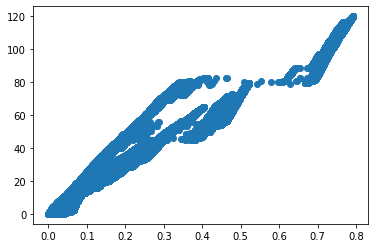

In [ ]:
plt.scatter(X_train,Y_train)
plt.show()

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr = sm.OLS(Y_train, X_train_sm).fit()
# Printing the parameters
lr.params

const     -0.496641
NGA      154.786935
dtype: float64

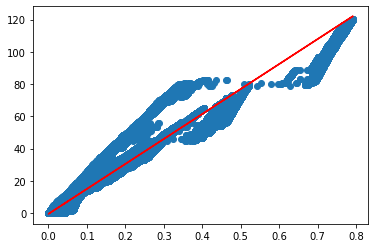

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, -0.496641 + 154.786935*X_train, 'r')
plt.show()

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

(0.0, 4000000.0, 0.0, 150.0)

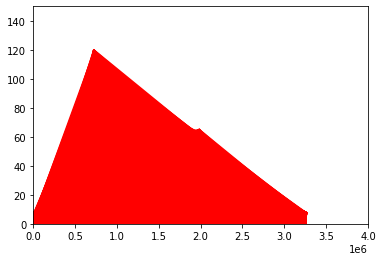

In [ ]:
plt.plot(Y_train,color='red')
plt.axis([0,4*(10**6),0,150])

# **Evaluation**

---
Linear regression
*  Model choice : Linear regression
*  Why this model ? : prediction of the signal G
*  target = 'G'
*  features = 'NGA'
*  Why this features ? : view correlation matrix
---

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 5.725e+07
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:40:37   Log-Likelihood:            -4.9621e+06
No. Observations:             2284800   AIC:                         9.924e+06
Df Residuals:                 2284798   BIC:                         9.924e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4966      0.002   -270.145      0.000      -0.500      -0.493
NGA          154.7869      0.020   7566.355      0.000     154.747     154.827
==============================================================================
Omnibus:                  1153541.662   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         89156024.479
Skew:                           1.573   Prob(JB):                         0.00
Kurtosis:                      33.440   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 2.1230226240545096
le score R2 est 0.9616223068263421


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 2.1251735385816595
le score R2 est 0.961792356923065


In [ ]:
y_train_pred = lr.predict(X_train_sm)
residu = (Y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


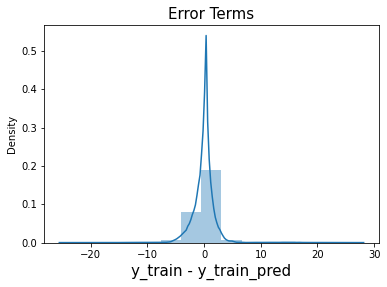

In [ ]:
fig = plt.figure()
sns.distplot(residu, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# **Modeling** 

---
*  Model choice : Linear regression double
*  target = 'G'
*  features = **'NGA' and 'NGV'**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/12.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(np.c_[df1['NGA'],df1['NGV']], columns = ['NGA', 'NGV'])
Y=df1['G']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2284800, 2)
(979200, 2)
(2284800,)
(979200,)


In [ ]:
from sklearn.linear_model import LinearRegression
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

In [ ]:
X_train=np.arange(0,len(X_train),1)

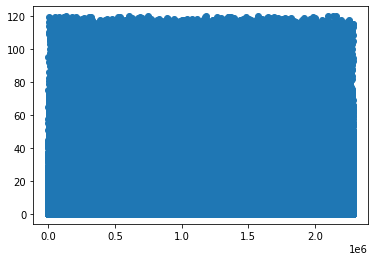

In [ ]:
plt.scatter(X_train,Y_train)
plt.show()

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [ ]:
lr = sm.OLS(Y_train, X_train_sm).fit()
# Printing the parameters
lr.params

const    8.484935e+00
x1      -5.524012e-09
dtype: float64

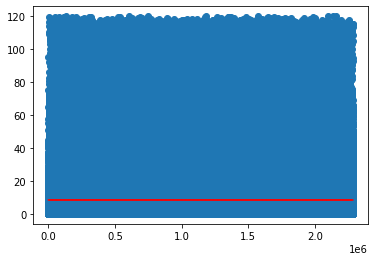

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 8.484935e+00 - 5.524012e-09*X_train, 'r')
plt.show()

In [ ]:
#evaluation
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2583
Date:                Fri, 15 Apr 2022   Prob (F-statistic):              0.611
Time:                        21:39:46   Log-Likelihood:            -8.6866e+06
No. Observations:             2284800   AIC:                         1.737e+07
Df Residuals:                 2284798   BIC:                         1.737e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4849      0.014    591.735      0.000       8.457       8.513
x1         -5.524e-09   1.09e-08     -0.508      0.611   -2.68e-08    1.58e-08
==============================================================================
Omnibus:                  1702465.552   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34739619.930
Skew:                           3.462   Prob(JB):                         0.00
Kurtosis:                      20.804   Cond. No.                     2.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



> We should had predicted this very bad regression because our selection of features was not wise because even if there was a high correlation with the target there was also a high corellation between the features ! 



# **Pre-processing the data (second try)**

---



Now let's try to drop the missing rows, we will miss the accuracy but let's give it a try.

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/12.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.head(10)

,Unnamed: 0,pos,NGA,NGV,G,F,C
0,0,P1V,0.000659,0.000000,0.165129,Normal,None
1,1,P1H,0.001067,0.000000,0.172528,Normal,None
2,2,P2V,0.001307,0.000000,0.180150,Normal,None
3,3,P2A,0.001421,0.000000,0.256356,Normal,None
4,4,P1V,0.001521,0.000000,0.391828,Normal,None
5,5,P1H,0.001682,0.000000,0.392006,Normal,None
6,6,P2V,0.001822,0.296606,0.400378,Normal,None
7,7,P2A,0.001923,0.479937,0.452721,Normal,None
8,8,P1V,0.002026,0.592609,0.465285,Normal,None
9,9,P1H,0.002149,0.656683,0.493702,Normal,None


In [ ]:
df1.isna().sum()

Unnamed: 0          0
pos           3262980
NGA                 0
NGV                 0
G                   0
F             3262980
C             3262980
dtype: int64

In [ ]:
df2 = df1.dropna()
df2

,Unnamed: 0,pos,NGA,NGV,G,F,C
0,0,P1V,0.000659,0.000000,0.165129,Normal,None
1,1,P1H,0.001067,0.000000,0.172528,Normal,None
2,2,P2V,0.001307,0.000000,0.180150,Normal,None
3,3,P2A,0.001421,0.000000,0.256356,Normal,None
4,4,P1V,0.001521,0.000000,0.391828,Normal,None
...,...,...,...,...,...,...,...
1015,1015,P2A,0.020090,0.884283,3.964699,Structural Fault,Frame
1016,1016,P1V,0.020099,0.884285,3.964869,Structural Fault,Frame
1017,1017,P1H,0.020106,0.884288,3.965581,Structural Fault,Frame
1018,1018,P2V,0.020114,0.884291,3.966773,Structural Fault,Frame



> 3.262.980 rows dropped out... wow, this is not good❗

In [ ]:
df2.isna().sum()

Unnamed: 0    0
pos           0
NGA           0
NGV           0
G             0
F             0
C             0
dtype: int64



> But clean ❤



In [ ]:
#saving
df2.to_csv('/content/drive/MyDrive/cleaned_data_2.csv')

# **Re-Modeling**


---
Choice of model : **RNN**
Target : G
---





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/cleaned_data_2.csv')

In [ ]:
df1.head(10)

,Unnamed: 0,Unnamed: 0.1,pos,NGA,NGV,G,F,C
0,0,0,P1V,0.000659,0.000000,0.165129,Normal,None
1,1,1,P1H,0.001067,0.000000,0.172528,Normal,None
2,2,2,P2V,0.001307,0.000000,0.180150,Normal,None
3,3,3,P2A,0.001421,0.000000,0.256356,Normal,None
4,4,4,P1V,0.001521,0.000000,0.391828,Normal,None
5,5,5,P1H,0.001682,0.000000,0.392006,Normal,None
6,6,6,P2V,0.001822,0.296606,0.400378,Normal,None
7,7,7,P2A,0.001923,0.479937,0.452721,Normal,None
8,8,8,P1V,0.002026,0.592609,0.465285,Normal,None
9,9,9,P1H,0.002149,0.656683,0.493702,Normal,None


In [ ]:
df1.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
pos             0
NGA             0
NGV             0
G               0
F               0
C               0
dtype: int64

In [ ]:
data=df1[['G']].values
data
len(data)

1020

In [ ]:
#data=data[:-1632000]
#len(data)

0

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(data)

In [ ]:
X_data=[]
Y_data=[]
look_back=100
for i in range(len(data_scaled)-101):
    X_data.append(data_scaled[i:i+look_back,0])
    Y_data.append(data_scaled[i+look_back,0])

In [ ]:
X_data,Y_data=np.array(X_data),np.array(Y_data)

In [ ]:
X_data=np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))

In [ ]:
train_size=int(len(X_data)-200)
test_size=len(X_data)-train_size
X_train=X_data[0:train_size,:]
X_test=X_data[train_size:len(X_data),:]
Y_train=Y_data[0:train_size]
Y_test=Y_data[train_size:len(Y_data)]

In [ ]:
model=Sequential()
model.add(LSTM(units=365, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=365))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 365)          535820    
                                                                 
 lstm_13 (LSTM)              (None, 365)               1067260   
                                                                 
 dense_3 (Dense)             (None, 1)                 366       
                                                                 
Total params: 1,603,446
Trainable params: 1,603,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,X_train,epochs=20,batch_size=100)

Epoch 1/20
8/8 [==============================] - 23s 2s/step - loss: 0.0617 - accuracy: 1.3908e-05
Epoch 2/20
8/8 [==============================] - 19s 2s/step - loss: 0.0128 - accuracy: 1.3908e-05
Epoch 3/20
8/8 [==============================] - 19s 2s/step - loss: 0.0047 - accuracy: 1.3908e-05
Epoch 4/20
8/8 [==============================] - 19s 2s/step - loss: 0.0040 - accuracy: 1.3908e-05
Epoch 5/20
8/8 [==============================] - 19s 2s/step - loss: 0.0023 - accuracy: 1.3908e-05
Epoch 6/20
8/8 [==============================] - 19s 2s/step - loss: 0.0015 - accuracy: 1.3908e-05
Epoch 7/20
8/8 [==============================] - 19s 2s/step - loss: 9.7546e-04 - accuracy: 1.3908e-05
Epoch 8/20
8/8 [==============================] - 19s 2s/step - loss: 8.0113e-04 - accuracy: 1.3908e-05
Epoch 9/20
8/8 [==============================] - 19s 2s/step - loss: 7.7338e-04 - accuracy: 1.3908e-05
Epoch 10/20
8/8 [==============================] - 19s 2s/step - loss: 7.7411e-04 - accu

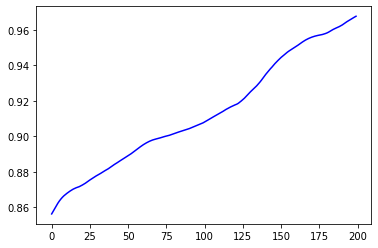

In [ ]:
y_pred=model.predict(X_test)
plt.plot(y_pred,color='blue')

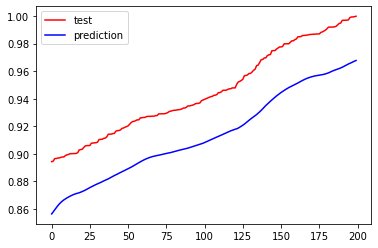

In [ ]:
plt.plot(Y_test,color='red')
plt.plot(y_pred,color='blue')
plt.legend(['test', 'prediction'], loc='upper left')
plt.title('comparing test & prediction')

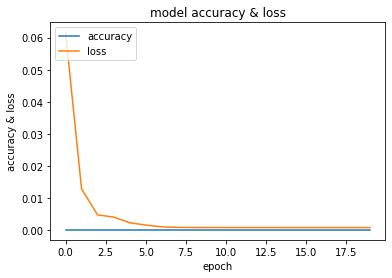

In [ ]:
# Evaluation
# summarize history for accuracy & history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy & loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

# **Re-Modeling**


---
*   Choice of model : **Classification multilabel**
*   Features : G, NGA, NGV
*   target : type of problem C
---

In [ ]:
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/cleaned_data_2.csv')

In [ ]:
df1

,Unnamed: 0,Unnamed: 0.1,pos,NGA,NGV,G,F,C
0,0,0,P1V,0.000659,0.000000,0.165129,Normal,None
1,1,1,P1H,0.001067,0.000000,0.172528,Normal,None
2,2,2,P2V,0.001307,0.000000,0.180150,Normal,None
3,3,3,P2A,0.001421,0.000000,0.256356,Normal,None
4,4,4,P1V,0.001521,0.000000,0.391828,Normal,None
...,...,...,...,...,...,...,...,...
1015,1015,1015,P2A,0.020090,0.884283,3.964699,Structural Fault,Frame
1016,1016,1016,P1V,0.020099,0.884285,3.964869,Structural Fault,Frame
1017,1017,1017,P1H,0.020106,0.884288,3.965581,Structural Fault,Frame
1018,1018,1018,P2V,0.020114,0.884291,3.966773,Structural Fault,Frame


In [ ]:
df1.pop("Unnamed: 0.1")

0          0
1          1
2          2
3          3
4          4
        ... 
1015    1015
1016    1016
1017    1017
1018    1018
1019    1019
Name: Unnamed: 0.1, Length: 1020, dtype: int64

In [ ]:
df1.to_csv('/content/drive/MyDrive/cleaned_data_3.csv')

In [ ]:
df1.head(10)

,pos,NGA,NGV,G,F,C
0,P1V,0.000659,0.000000,0.165129,Normal,None
1,P1H,0.001067,0.000000,0.172528,Normal,None
2,P2V,0.001307,0.000000,0.180150,Normal,None
3,P2A,0.001421,0.000000,0.256356,Normal,None
4,P1V,0.001521,0.000000,0.391828,Normal,None
5,P1H,0.001682,0.000000,0.392006,Normal,None
6,P2V,0.001822,0.296606,0.400378,Normal,None
7,P2A,0.001923,0.479937,0.452721,Normal,None
8,P1V,0.002026,0.592609,0.465285,Normal,None
9,P1H,0.002149,0.656683,0.493702,Normal,None


In [ ]:
df1.keys()

Index(['pos', 'NGA', 'NGV', 'G', 'F', 'C'], dtype='object')

In [ ]:
df3=pd.get_dummies(df1, columns = ["F"], prefix = 'P')
df3

,pos,NGA,NGV,G,C,P_Bearing Lubrification Fault,P_Gear fault,P_Imbalance,P_Mechanical looseness,P_Misalignment,P_Normal,P_Structural Fault
0,P1V,0.000659,0.000000,0.165129,None,0,0,0,0,0,1,0
1,P1H,0.001067,0.000000,0.172528,None,0,0,0,0,0,1,0
2,P2V,0.001307,0.000000,0.180150,None,0,0,0,0,0,1,0
3,P2A,0.001421,0.000000,0.256356,None,0,0,0,0,0,1,0
4,P1V,0.001521,0.000000,0.391828,None,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,P2A,0.020090,0.884283,3.964699,Frame,0,0,0,0,0,0,1
1016,P1V,0.020099,0.884285,3.964869,Frame,0,0,0,0,0,0,1
1017,P1H,0.020106,0.884288,3.965581,Frame,0,0,0,0,0,0,1
1018,P2V,0.020114,0.884291,3.966773,Frame,0,0,0,0,0,0,1


In [ ]:
df3.pop("pos")

0       P1V
1       P1H
2       P2V
3       P2A
4       P1V
       ... 
1015    P2A
1016    P1V
1017    P1H
1018    P2V
1019    P2A
Name: pos, Length: 1020, dtype: object

In [ ]:
df3.pop("C")

0        None
1        None
2        None
3        None
4        None
        ...  
1015    Frame
1016    Frame
1017    Frame
1018    Frame
1019    Frame
Name: C, Length: 1020, dtype: object

In [ ]:
df3

,NGA,NGV,G,P_Bearing Lubrification Fault,P_Gear fault,P_Imbalance,P_Mechanical looseness,P_Misalignment,P_Normal,P_Structural Fault
0,0.000659,0.000000,0.165129,0,0,0,0,0,1,0
1,0.001067,0.000000,0.172528,0,0,0,0,0,1,0
2,0.001307,0.000000,0.180150,0,0,0,0,0,1,0
3,0.001421,0.000000,0.256356,0,0,0,0,0,1,0
4,0.001521,0.000000,0.391828,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1015,0.020090,0.884283,3.964699,0,0,0,0,0,0,1
1016,0.020099,0.884285,3.964869,0,0,0,0,0,0,1
1017,0.020106,0.884288,3.965581,0,0,0,0,0,0,1
1018,0.020114,0.884291,3.966773,0,0,0,0,0,0,1


In [ ]:
X_features=pd.DataFrame(np.c_[df3['NGA'],df3['NGV'],df3['G']], columns = ['NGA', 'NGV', 'G'])

In [ ]:
Y = df3[['P_Bearing Lubrification Fault', 'P_Gear fault', 'P_Imbalance','P_Mechanical looseness','P_Misalignment', 'P_Normal', 'P_Structural Fault']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_features,Y,test_size=0.3,random_state=42)

In [ ]:
categories = ['P_Bearing Lubrification Fault', 'P_Gear fault', 'P_Imbalance','P_Mechanical looseness','P_Misalignment', 'P_Normal', 'P_Structural Fault']

In [ ]:
pip install scikit-multilearn

     |████████████████████████████████| 89 kB 5.2 MB/s 


In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

In [ ]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

In [ ]:
# train
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [ ]:
# predict
predictions = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feat

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.3954248366013072

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.4738562091503268

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7287581699346405

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
     |████████████████████████████████| 22.3 MB 6.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.


In [ ]:
#from skmultilearn.adapt import MLkNN

#classifier = MLkNN(k=20)

# train
#classifier.fit(np.array(X_train), np.array(y_train))

# predict
#predictions = classifier.predict(X_test)

#accuracy_score(y_test,predictions)